In [533]:
# Import necessary libraries and set plotting parameters
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import calendar
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='white'
plt.rcParams["figure.dpi"] = 125

In [534]:
# Import data and state tab from file
data=pd.read_excel('~/Downloads/Analytics Core Competency - PM Data Analytics.xls',sheetname='Data')
state=pd.read_excel('~/Downloads/Analytics Core Competency - PM Data Analytics.xls',sheetname='State')

In [535]:
# show data types of relevant columns
data.dtypes

date_sign_up         datetime64[ns]
customer_id                   int64
product_name                 object
marketing_channel            object
City                         object
dtype: object

### 1. Which customer ID bought most food boxes, and what city were they from?

#### Using groupby we can group the data set on customer_id to get the count of products for each customer and pull in the city associated with that customer

In [536]:
df=data.groupby(['customer_id'],as_index=False).agg({'product_name':'count','City':'max'})
df.rename(columns={'product_name':'order_count'},inplace=True)

In [537]:
df[df['order_count']==df['order_count'].max()]

,customer_id,City,order_count
387,220418,Philadelphia,3


### 2. How many customers purchased more than 1 product? Solve with 1 formula and show the formula you used.
#### Using the same dataframe from 1 we can filter data on product count greater than 1 and output the number of records

In [538]:
multi_product=df[df['order_count']>1]
len(multi_product)

4

### 3. Prepare a table chart that shows sold food boxes per weekday (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday). Explain how you calculated weekday.
#### Using calendar library to create a weekday_name list and a lamba function to refrence the list based on the weekday number of the datetime values then grouped data on weekday and  plotted data using pandas plot

In [539]:
weekday_name = list(calendar.day_name)
data['weekday'] = pd.Categorical(data['date_sign_up'].apply(
    lambda x: weekday_name[x.weekday()]), categories=day_name, ordered=True)

In [540]:
week_data=data.groupby(['weekday'],as_index=False).agg({'product_name':'count'})
week_data.rename(columns={'product_name':'order_count'},inplace=True)

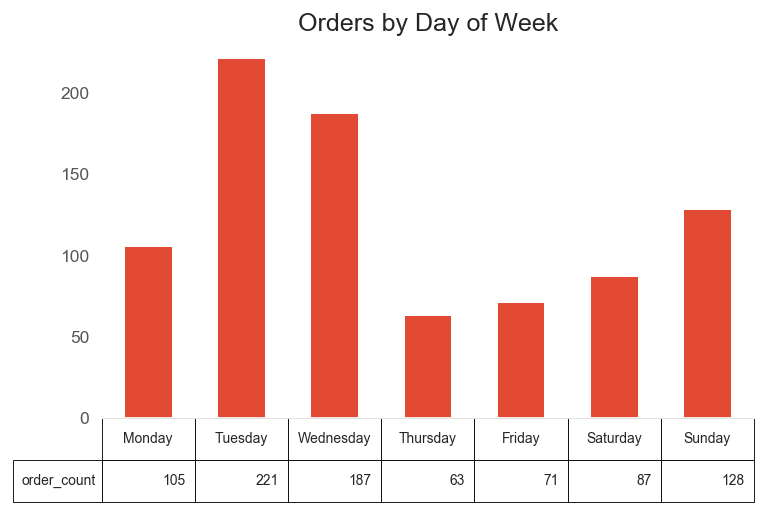

In [541]:
week_plot=week_data.plot(kind='bar',table=True,x=['weekday'],y=['order_count'],title='Orders by Day of Week',legend=False);
week_plot.axes.get_xaxis().set_visible(False)
table = week_plot.tables[0]
table.set_fontsize(15)
table.scale(1,2);

### 4. What were the earliest and latest times of day we sold a product on 04/14/2015?
#### Create date and time columns from date_sign_up and ouput the min/max times for records on 4/14/2015

In [542]:
data['date']=data['date_sign_up'].apply(lambda x: x.date())
data['time']=data['date_sign_up'].apply(lambda x: x.time())

In [543]:
print data[data['date']==datetime.date(2015,4,14)]['time'].min()

03:16:18


In [544]:
print data[data['date']==datetime.date(2015,4,14)]['time'].max()

23:13:19


### 5. How many products did we sell for 2 people? How many products did we sell for 4 people? Solve with formulas, not a pivot table.
#### Given that that the position of the # of people is consistent within the product name I used string search based on the position of 'people' in the name to return the # of people in the column people_served

In [545]:
data['product_name'].unique()

array([u'Classic - 3 meals per week for 4 people',
       u'Classic - 3 meals per week for 2 people',
       u'3 Meals (vegetarian) for 4 people',
       u'3 Meals (vegetarian) for 2 people'], dtype=object)

In [546]:
data['people_served']=data['product_name'].apply(lambda x: x[x.find('people')-2:x.find('people')-1])

In [547]:
pd.DataFrame(data['people_served'].value_counts())

,people_served
2,720
4,142


### 6. How many veggie food boxes did we sell on 04/14/2015 via marketing channel Newsletters? Solve with 1 formula and show the formula you used.
#### Filtered dataframe on date marketing channel containing 'Newsletters' and product_name containing 'vegetarian' to produce dataframe with only records that match all 3 parameters output length of dataframe to show number of records

In [548]:
data['marketing_channel'].unique()

array([u'Newsletters (internal)', u'Search Engine Marketing',
       u'TV / Radio Advertising', u'Partnership Marketing'], dtype=object)

In [549]:
data['product_name'].unique()

array([u'Classic - 3 meals per week for 4 people',
       u'Classic - 3 meals per week for 2 people',
       u'3 Meals (vegetarian) for 4 people',
       u'3 Meals (vegetarian) for 2 people'], dtype=object)

In [550]:
veg_orders = data[(data['date'] == datetime.date(2015, 4, 14)) & (data['marketing_channel']).str.contains(
    'Newsletters') & (data['product_name'].str.contains('vegetarian'))]
len(veg_orders)

11

### 7. Add an additional column in the Data tab, in which you convert Column A from DateTime to Date format with a formula. Prepare a table chart showing how many classic food boxes and how many veggie food boxes we sold per date
#### Extract Date from date_sign_up timestamp and created product_type column by applying simple function that checks for keyword 'Classic' in product_name then grouped and  pivoted data on product_type and plotted using pandas plot.

In [551]:
data['product_name'].unique()

array([u'Classic - 3 meals per week for 4 people',
       u'Classic - 3 meals per week for 2 people',
       u'3 Meals (vegetarian) for 4 people',
       u'3 Meals (vegetarian) for 2 people'], dtype=object)

In [552]:
data['date']=data['date_sign_up'].apply(lambda x: x.date()) # Did this in Question 4 as well

In [553]:
def get_product_type(x):
    if 'Classic' in x:
        return 'Classic'
    else:
        return 'Vegetarian'

In [554]:
data['product_type']=data['product_name'].apply(lambda x: get_product_type(x))

In [555]:
date_df=data.groupby(['date','product_type'],as_index=False).agg({'product_name':'count'})
date_df.rename(columns={'product_name':'order_count'},inplace=True)

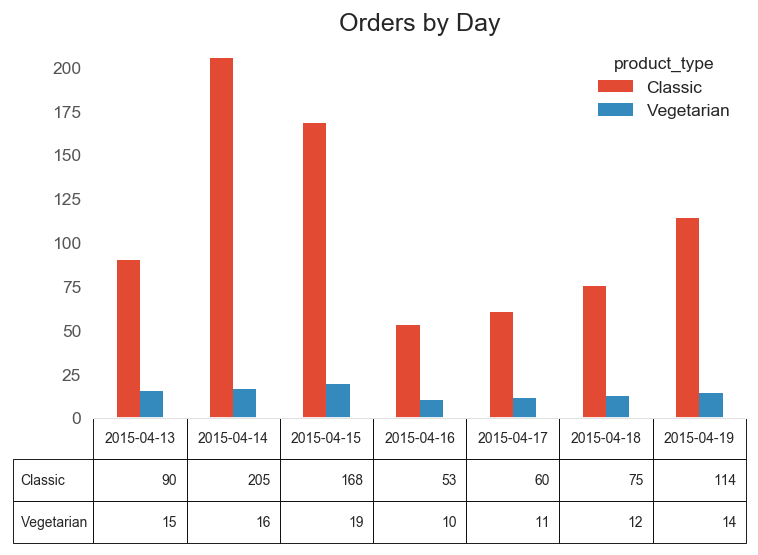

In [556]:
date_plot = date_df.pivot(index='date', columns='product_type', values='order_count').plot(
    kind='bar', table=True, title='Orders by Day', legend=True)
date_plot.axes.get_xaxis().set_visible(False)
table = date_plot.tables[0]
table.scale(1, 2)

### 8. How many "Classic - 3 meals per week for 2 people" boxes did we sell via marketing channel "TV / Radio Advertising"? Solve with 1 formula and show the formula you used.
#### Filtered dataframe on the parameters and output the length of the filtered dataframe.

In [557]:
class_df=data[(data['product_name']=='Classic - 3 meals per week for 2 people')&(data['marketing_channel']=='TV / Radio Advertising')]
len(class_df)

203

### 9. In an additional column in the Data tab, mark all boxes sold in "New York" via Marketing channel "Newsletters (internal)" with a 1, and all other box city combinations with a 0. Solve with 1 formula and show the formula you used
#### Used function that searches the relevant columns and each row and returns 1 when it matches the parameters and 0 when it doesn't. Applied this function to dataframe to create 'ny_by_news' column

In [558]:
def tag_ny_news(row):
    if 'New York' in row['City'] and 'Newsletters' in row['marketing_channel']:
        return 1
    else:
        return 0

In [559]:
data['ny_by_news'] = data.apply(tag_ny_news,axis=1)
data[['date_sign_up','customer_id','product_name','marketing_channel','City','ny_by_news']]

,date_sign_up,customer_id,product_name,marketing_channel,City,ny_by_news
0,2015-04-15 09:55:21,220418,Classic - 3 meals per week for 4 people,Newsletters (internal),Philadelphia,0
1,2015-04-15 09:55:22,220418,Classic - 3 meals per week for 4 people,Newsletters (internal),Philadelphia,0
2,2015-04-15 09:55:22,220418,Classic - 3 meals per week for 2 people,Newsletters (internal),Philadelphia,0
3,2015-04-15 18:12:20,221501,3 Meals (vegetarian) for 4 people,Newsletters (internal),Philadelphia,0
4,2015-04-15 18:12:20,221501,Classic - 3 meals per week for 2 people,Newsletters (internal),Philadelphia,0
5,2015-04-15 19:32:18,221710,3 Meals (vegetarian) for 2 people,Newsletters (internal),San Diego,0
6,2015-04-15 19:32:18,221710,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,0
7,2015-04-19 19:56:20,226594,Classic - 3 meals per week for 2 people,Newsletters (internal),Miami,0
8,2015-04-19 19:56:21,226594,Classic - 3 meals per week for 4 people,Newsletters (internal),Miami,0
9,2015-04-17 13:11:19,71041,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Diego,0


### 10. Create an additional column in tab Data that shows state from tab State without changing the State tab. Explain your process.
#### Transformed State data into a dictionary and created State columb by mapping the dictionary back to City column of the original dataframe

In [560]:
state_dict=state.T.to_dict()
state_dict=dict((v, k) for k, v in state_dict[0].iteritems())

In [561]:
data['State']=data['City'].map(state_dict)
data[['date_sign_up','customer_id','product_name','marketing_channel','City','State']]

,date_sign_up,customer_id,product_name,marketing_channel,City,State
0,2015-04-15 09:55:21,220418,Classic - 3 meals per week for 4 people,Newsletters (internal),Philadelphia,Pennsylvania
1,2015-04-15 09:55:22,220418,Classic - 3 meals per week for 4 people,Newsletters (internal),Philadelphia,Pennsylvania
2,2015-04-15 09:55:22,220418,Classic - 3 meals per week for 2 people,Newsletters (internal),Philadelphia,Pennsylvania
3,2015-04-15 18:12:20,221501,3 Meals (vegetarian) for 4 people,Newsletters (internal),Philadelphia,Pennsylvania
4,2015-04-15 18:12:20,221501,Classic - 3 meals per week for 2 people,Newsletters (internal),Philadelphia,Pennsylvania
5,2015-04-15 19:32:18,221710,3 Meals (vegetarian) for 2 people,Newsletters (internal),San Diego,NaN
6,2015-04-15 19:32:18,221710,Classic - 3 meals per week for 4 people,Newsletters (internal),San Diego,NaN
7,2015-04-19 19:56:20,226594,Classic - 3 meals per week for 2 people,Newsletters (internal),Miami,Florida
8,2015-04-19 19:56:21,226594,Classic - 3 meals per week for 4 people,Newsletters (internal),Miami,Florida
9,2015-04-17 13:11:19,71041,Classic - 3 meals per week for 2 people,Search Engine Marketing,San Diego,California


### 11. Prepare a table chart that shows sold food boxes per marketing channel in San Diego (Hint: Clean up city name "San Diego" in column E first, and explain how you got all San Diego variations into a format you can work with)
#### Since all San Diego variations contain 'ego' I simply replace all city records where 'ego' appears with San Diego to standardize the the name throughout the entire dataset.

In [562]:
data['City'].unique()

array([u'Philadelphia', u'San Diego', u'Miami', u'San Diego ',
       u'Los Angeles', u'San Francisco', u'Washington', u'1San Diego',
       u'Chicago', u'New York', u'SanDiego', u'San Dego'], dtype=object)

In [563]:
data.loc[data['City'].str.find('ego')>0,'City']='San Diego'

In [564]:
sd_df=data[data['City']=='San Diego'].groupby(['marketing_channel'],as_index=False).agg({'product_name':'count'})
sd_df.rename(columns={'product_name':'order_count'},inplace=True)

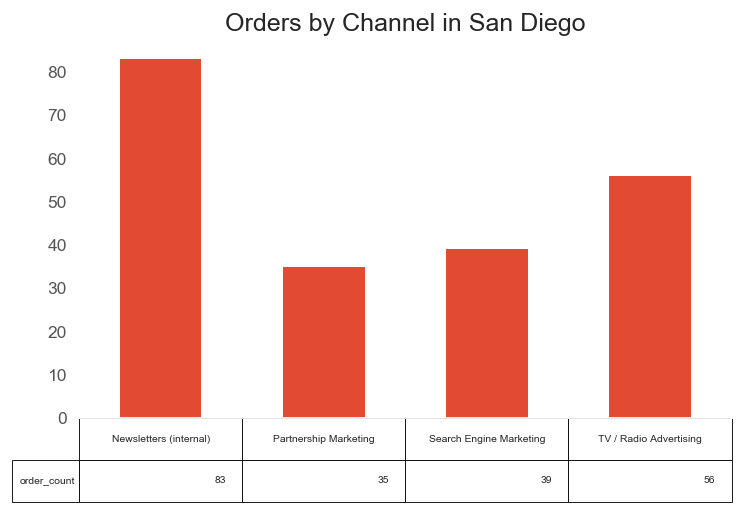

In [565]:
sd_plot = sd_df.plot(kind='bar', table=True, x=['marketing_channel'], y=[
                         'order_count'], title='Orders by Channel in San Diego', legend=False)
sd_plot.axes.get_xaxis().set_visible(False)
table = sd_plot.tables[0]
table.set_fontsize(15)
table.scale(1, 2)

### Bonus: Using the date column you previously created, write a single formula (and run it down multiple cells) that shows all the customer IDs that ordered a box on 04/14/2015 (Hint: there should be 221 records)

#### Filter Dataframe on Date and display customer ids


In [566]:
data[data['date'] == datetime.date(2015, 4, 14)]['customer_id']

10     103289
11     107746
12     157441
19     194229
24     205233
28     208079
30     213420
32     213711
39     215332
142    217365
143    217380
144    217455
145    217460
146    217477
147    217539
148    217566
149    217572
150    217631
151    217652
152    217658
153    217690
154    217717
155    217730
156    217735
158    217749
159    217758
160    217776
161    217778
163    217787
164    217788
        ...  
327    219481
328    219487
329    219494
330    219512
331    219517
332    219520
333    219522
334    219530
335    219545
336    219546
337    219549
338    219568
339    219579
340    219590
341    219598
342    219600
343    219649
344    219655
345    219662
346    219667
347    219688
348    219700
349    219703
350    219705
351    219716
352    219726
353    219729
354    219731
355    219732
356    219736
Name: customer_id, Length: 221, dtype: int64